In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Get the dataset
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
X_train = x_train.reshape(x_train.shape[0], -1)
X_test = x_test.reshape(x_test.shape[0], -1)

In [4]:
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.l1 = nn.Linear(784, 128, bias=False)
        self.a1 = nn.ReLU()
        self.l2 = nn.Linear(128, 10, bias=False)
        self.a2 = nn.Softmax(dim=1)
    def forward(self, x):
        out = self.l1(x)
        out = self.a1(out)
        out = self.l2(out)
        out = self.a2(out)
        return out

In [5]:
model = NN()
loss_function = nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
BS = 128
losses, accuracies = [], []

In [8]:
for i in range(1000):
    samples = np.random.randint(0, X_train.shape[0], size=BS)
    xs = torch.Tensor(X_train[samples]).float()
    ys = torch.Tensor(y_train[samples]).long()
    out = model(xs)
    pred = torch.argmax(out, dim=1)
    accuracy = (ys == pred).float().mean()
    model.zero_grad()
    loss = loss_function(out, ys)
    loss.backward()
    optimizer.step()
    loss, accuracy = loss.item(), accuracy.item()
    losses.append(loss)
    accuracies.append(accuracy)
    if i % 100 == 0: print("step %d: loss %.2f, accuracy %.2f" % (i, loss, accuracy*100))

step 0: loss -0.71, accuracy 71.09
step 100: loss -0.72, accuracy 71.09
step 200: loss -0.66, accuracy 65.62
step 300: loss -0.66, accuracy 65.62
step 400: loss -0.67, accuracy 67.97
step 500: loss -0.70, accuracy 70.31
step 600: loss -0.68, accuracy 68.75
step 700: loss -0.69, accuracy 68.75
step 800: loss -0.69, accuracy 67.97
step 900: loss -0.67, accuracy 67.19


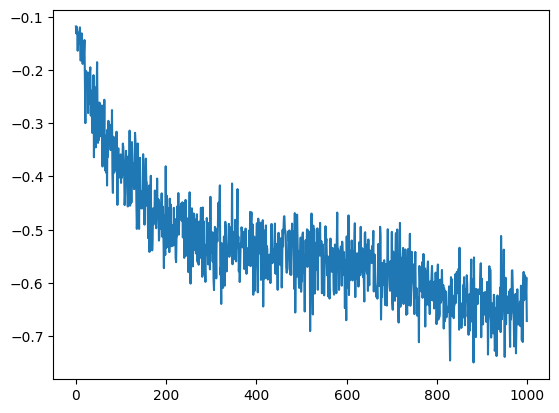

In [7]:
plt.plot(losses)